In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

def remove_math_expressions(text):
    # 去除 LaTeX 的数学公式：$...$、$$...$$、\(...\)、\[...\]
    text = re.sub(r'\$\$.*?\$\$', '', text, flags=re.DOTALL)
    text = re.sub(r'\$.*?\$', '', text, flags=re.DOTALL)
    text = re.sub(r'\\\[(.*?)\\\]', '', text, flags=re.DOTALL)
    text = re.sub(r'\\\((.*?)\\\)', '', text, flags=re.DOTALL)
    # 去除 LaTeX 环境块
    text = re.sub(r'\\begin\{.*?\}.*?\\end\{.*?\}', '', text, flags=re.DOTALL)
    # 去除 HTML <math> 标签
    text = re.sub(r'<math.*?>.*?</math>', '', text, flags=re.DOTALL)
    return text

In [63]:
csv_folder = "/Users/qianiang/Library/CloudStorage/OneDrive-TUM/Studium/Data-Mining/physics.stackexchange.com/CSV"
csv_path = os.path.join(csv_folder, "Posts.csv")
df = pd.read_csv(csv_path)

In [64]:
df['AcceptedAnswerId'] = df['AcceptedAnswerId'].fillna(0)
df['ViewCount'] = df['ViewCount'].fillna(0)
df['AnswerCount'] = df['AnswerCount'].fillna(0)
df.dropna(subset=['Body'], inplace=True)
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df['LastEditDate'] = pd.to_datetime(df['LastEditDate'])
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'])

In [65]:
mask = df['ViewCount'].isna()
subset = df[mask]

result = subset[['AnswerCount']].isna().all(axis=1).all()
print("When ViewCount is NaN, then AnswerCount is NaN:", result)

When ViewCount is NaN, then AnswerCount is NaN: True


In [66]:
mask = (df['CommentCount'] != 0) & (df['ViewCount'].isna())
count = df[mask].shape[0]
print("CommentCount is not 0 but Viewcount is NaN:", count)

CommentCount is not 0 but Viewcount is NaN: 0


In [67]:
df

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ContentLicense,ParentId,OwnerDisplayName,ClosedDate,LastEditorDisplayName,CommunityOwnedDate,FavoriteCount
0,1,1,5.0,2010-11-02 18:59:01.140,87,20982.0,I often hear about subatomic particles having ...,7.0,520.0,2012-08-19 23:00:18.417,...,|quantum-mechanics|particle-physics|angular-mo...,6.0,3,CC BY-SA 2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,5704.0,2010-11-02 19:09:48.680,31,3946.0,How would you explain string theory to non-phy...,23.0,58382.0,2020-06-14 12:52:57.027,...,|string-theory|education|,4.0,4,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,180.0,2010-11-02 19:11:05.857,46,3308.0,This is a question that has been posted at man...,40.0,2451.0,2013-01-28 22:30:52.200,...,|particle-physics|group-theory|representation-...,3.0,2,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,0.0,2010-11-02 19:12:26.543,28,0.0,Imagine going to the rest frame of a massive p...,20.0,NaN,NaT,...,NaN,0.0,2,CC BY-SA 2.5,1.0,NaN,NaN,NaN,NaN,NaN
4,5,2,0.0,2010-11-02 19:15:20.813,52,0.0,Spin is a technical term specifically referrin...,13.0,75633.0,2017-12-13 08:24:54.477,...,NaN,0.0,0,CC BY-SA 3.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577296,808517,2,0.0,2024-03-31 22:43:15.067,1,0.0,Is the first trace in the question title a tra...,352117.0,352117.0,2024-04-01 15:39:37.470,...,NaN,0.0,0,CC BY-SA 4.0,799715.0,NaN,NaN,NaN,NaN,NaN
577297,808518,1,0.0,2024-03-31 22:49:37.613,1,32.0,Suppose we have a theory that is super-renorma...,288281.0,2451.0,2024-04-01 01:01:53.040,...,|quantum-field-theory|renormalization|feynman-...,0.0,0,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN
577298,808519,1,0.0,2024-03-31 22:59:29.267,0,32.0,What is the speed of light in a vacuum when th...,198517.0,2451.0,2024-04-01 00:57:51.470,...,|electromagnetic-radiation|visible-light|photo...,0.0,2,CC BY-SA 4.0,NaN,NaN,2024-04-01T00:59:26.323,NaN,NaN,NaN
577299,808520,1,808552.0,2024-03-31 23:05:36.567,1,66.0,For simplicity I will be considering $\phi^4$ ...,288281.0,2451.0,2024-04-01 01:26:51.400,...,|quantum-field-theory|renormalization|feynman-...,1.0,4,CC BY-SA 4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
print(df['AnswerCount'].describe())
# 过滤掉 CommentCount 为 0 的
AnswerCount = df[df['AnswerCount'] != 0]

# 自定义区间（bins）和标签
bins = [0, 5, 10, 20, float('inf')]
labels = ['1-5', '6-10', '11-20', '21+']

# 分类
AnswerCount['AnswerCountGroup'] = pd.cut(AnswerCount['AnswerCount'], bins=bins, labels=labels)

# 计算每个组别的数量和百分比
percentages = AnswerCount['AnswerCountGroup'].value_counts(normalize=True).sort_index() * 100

# 显示结果
print(percentages.round(2))

count    576958.000000
mean          0.592083
std           1.108555
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          49.000000
Name: AnswerCount, dtype: float64
AnswerCountGroup
1-5      98.20
6-10      1.65
11-20     0.14
21+       0.01
Name: proportion, dtype: float64


/var/folders/s1/fhhb47v56794fxv3thdrpkxm0000gn/T/ipykernel_97487/1004670.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AnswerCount['AnswerCountGroup'] = pd.cut(AnswerCount['AnswerCount'], bins=bins, labels=labels)


In [69]:
print(df['CommentCount'].describe())
# 过滤掉 CommentCount 为 0 的
CommentCount = df[df['CommentCount'] != 0]

# 自定义区间（bins）和标签
bins = [0, 5, 10, 20, float('inf')]
labels = ['1-5', '6-10', '11-20', '21+']

# 分类
CommentCount['CommentCountGroup'] = pd.cut(CommentCount['CommentCount'], bins=bins, labels=labels)

# 计算每个组别的数量和百分比
percentages = CommentCount['CommentCountGroup'].value_counts(normalize=True).sort_index() * 100

# 显示结果
print(percentages.round(2))

count    576958.000000
mean          1.968228
std           2.829263
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         144.000000
Name: CommentCount, dtype: float64
CommentCountGroup
1-5      82.46
6-10     14.17
11-20     3.24
21+       0.13
Name: proportion, dtype: float64


/var/folders/s1/fhhb47v56794fxv3thdrpkxm0000gn/T/ipykernel_97487/778270428.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CommentCount['CommentCountGroup'] = pd.cut(CommentCount['CommentCount'], bins=bins, labels=labels)



Percentage（%）：of MaintainDurationDays


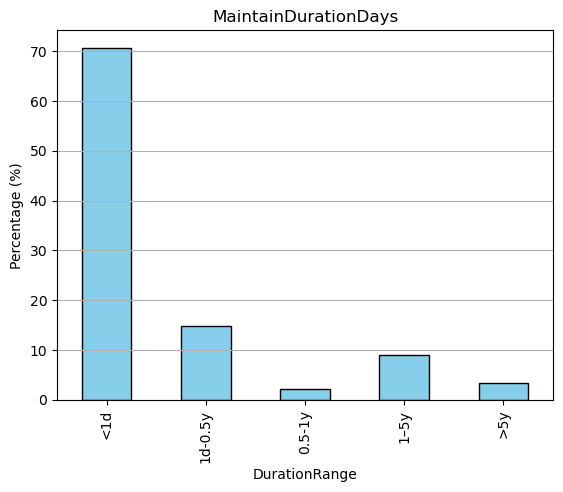

DurationRange
<1d        70.69
1d-0.5y    14.76
0.5-1y      2.08
1–5y        9.02
>5y         3.45
Name: count, dtype: float64


In [70]:
# 选取 LastEditDate 不为空的行
LastEditDate = df[df['LastEditDate'].notna()].copy()

# 计算维护时间（可以得到 Timedelta 类型）
LastEditDate['MaintainDuration'] = LastEditDate['LastEditDate'] - LastEditDate['CreationDate']
LastEditDate['MaintainDurationDays'] = LastEditDate['MaintainDuration'].dt.total_seconds() / (24 * 3600)

# 定义区间（单位：天）
bins = [0, 1, 180, 365, 5*365, float('inf')]
labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']

# 使用 pd.cut 创建区间标签列
LastEditDate['DurationRange'] = pd.cut(LastEditDate['MaintainDurationDays'], bins=bins, labels=labels, right=False)

# 统计频数和百分比
distribution = LastEditDate['DurationRange'].value_counts().sort_index()
percentage = (distribution / distribution.sum() * 100).round(2)

print("\nPercentage（%）：of MaintainDurationDays")

percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('MaintainDurationDays')
plt.xlabel('DurationRange')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.show()
print(percentage)


Percentage（%）: of ActiveDurationDays
ActiveDurationRange
<1d        78.39
1d-0.5y    11.32
0.5-1y      1.46
1–5y        6.11
>5y         2.73
Name: count, dtype: float64


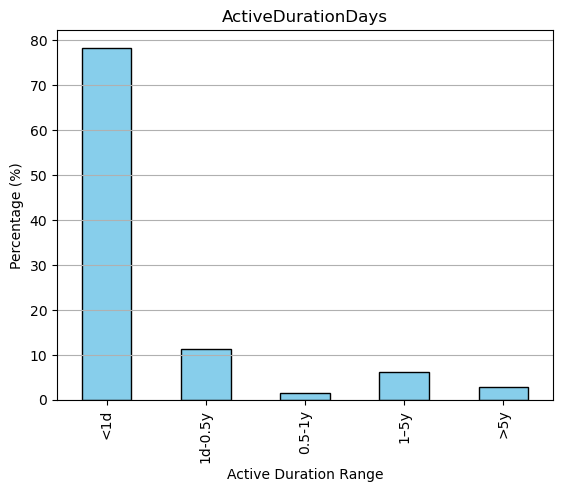

In [71]:
# 选取 LastActivityDate 不为空的行
LastActivityDate = df[df['LastActivityDate'].notna()].copy()

# 计算活跃时间（以天计）
LastActivityDate['ActiveDuration'] = LastActivityDate['LastActivityDate'] - LastActivityDate['CreationDate']
LastActivityDate['ActiveDurationDays'] = LastActivityDate['ActiveDuration'].dt.total_seconds() / (24 * 3600)

# 定义区间（单位：天）
bins = [0, 1, 180, 365, 5*365, float('inf')]
labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']

# 分组
LastActivityDate['ActiveDurationRange'] = pd.cut(LastActivityDate['ActiveDurationDays'], bins=bins, labels=labels, right=False)

# 统计频数和百分比
distribution = LastActivityDate['ActiveDurationRange'].value_counts().sort_index()
percentage = (distribution / distribution.sum() * 100).round(2)

# 打印结果
print("\nPercentage（%）: of ActiveDurationDays")
print(percentage)

percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('ActiveDurationDays')
plt.xlabel('Active Duration Range')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


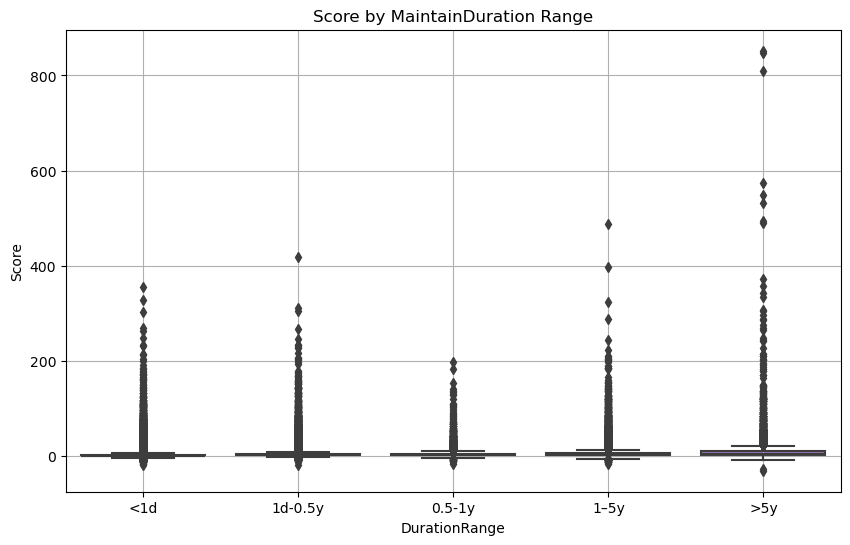

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


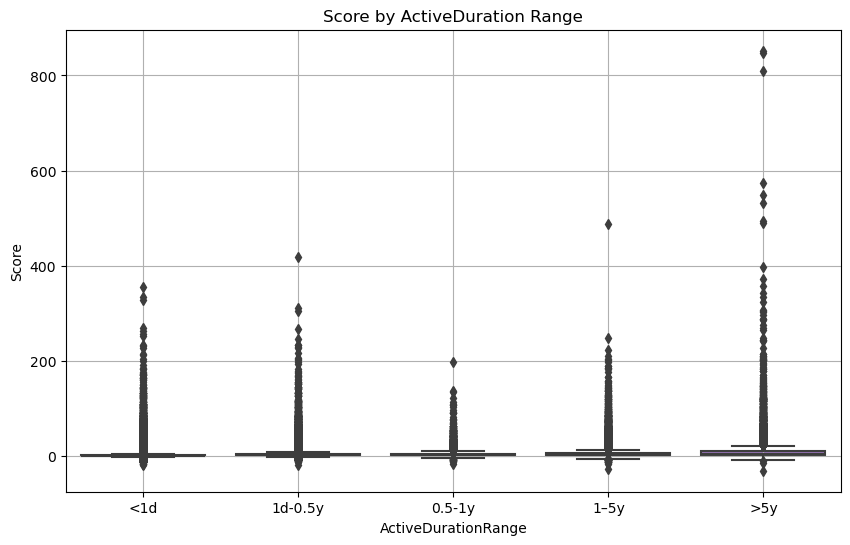

In [72]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='DurationRange', y='Score', data=LastEditDate)
plt.title('Score by MaintainDuration Range')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='ActiveDurationRange', y='Score', data=LastActivityDate)
plt.title('Score by ActiveDuration Range')
plt.grid(True)
plt.show()

In [73]:
corr = df[['Score', 'ViewCount']].corr(method='pearson')
print("Score 与 ViewCount 的相关系数：")
print(corr)

Score 与 ViewCount 的相关系数：
              Score  ViewCount
Score      1.000000   0.221884
ViewCount  0.221884   1.000000


/var/folders/s1/fhhb47v56794fxv3thdrpkxm0000gn/T/ipykernel_97487/536705474.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('ViewCountRange')['Score'].agg(['mean', 'median', 'count'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


                     mean  median  count
ViewCountRange                          
0–100            0.572889     0.0  59069
101–500          1.370783     1.0  91037
501–1k           2.446403     2.0  30188
1k–5k            4.389203     2.0  40845
5k–10k          10.125232     5.0   6995
10k–50k         16.285873     7.0   5401
>50k            36.390600    16.0    617


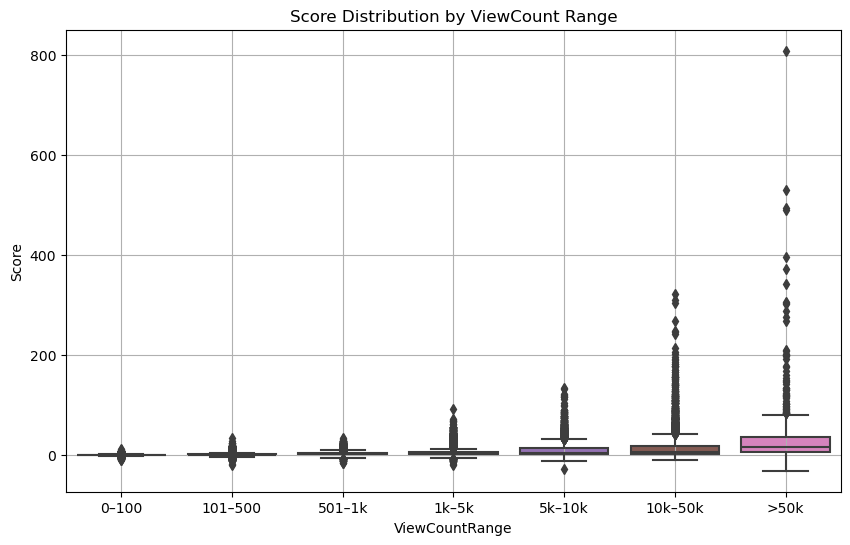

In [74]:
# 设置区间
bins = [0, 100, 500, 1000, 5000, 10000, 50000, float('inf')]
labels = ['0–100', '101–500', '501–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

df['ViewCountRange'] = pd.cut(df['ViewCount'], bins=bins, labels=labels)

# 分组统计 Score 的均值、中位数
grouped = df.groupby('ViewCountRange')['Score'].agg(['mean', 'median', 'count'])
print(grouped)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='ViewCountRange', y='Score', data=df)
plt.title('Score Distribution by ViewCount Range')
plt.grid(True)
plt.show()

In [75]:
df['YearMonth'] = df['CreationDate'].dt.to_period('M')

# Monthly post counts
monthly_counts = df['YearMonth'].value_counts().sort_index()
monthly_counts.index = monthly_counts.index.to_timestamp()

# Create DataFrame with yearly info
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Year'] = monthly_counts_df['YearMonth'].dt.year

# Get max and min month per year
# Sort to ensure tie-breaking by earliest month
monthly_counts_df = monthly_counts_df.sort_values(['Year', 'PostCount', 'YearMonth'])

# get the maxmonths
idx_max = monthly_counts_df.groupby('Year')['PostCount'].idxmax()
max_months = monthly_counts_df.loc[idx_max].drop_duplicates(subset='Year')

# get the minmonths
idx_min = monthly_counts_df.groupby('Year')['PostCount'].idxmin()
min_months = monthly_counts_df.loc[idx_min].drop_duplicates(subset='Year')

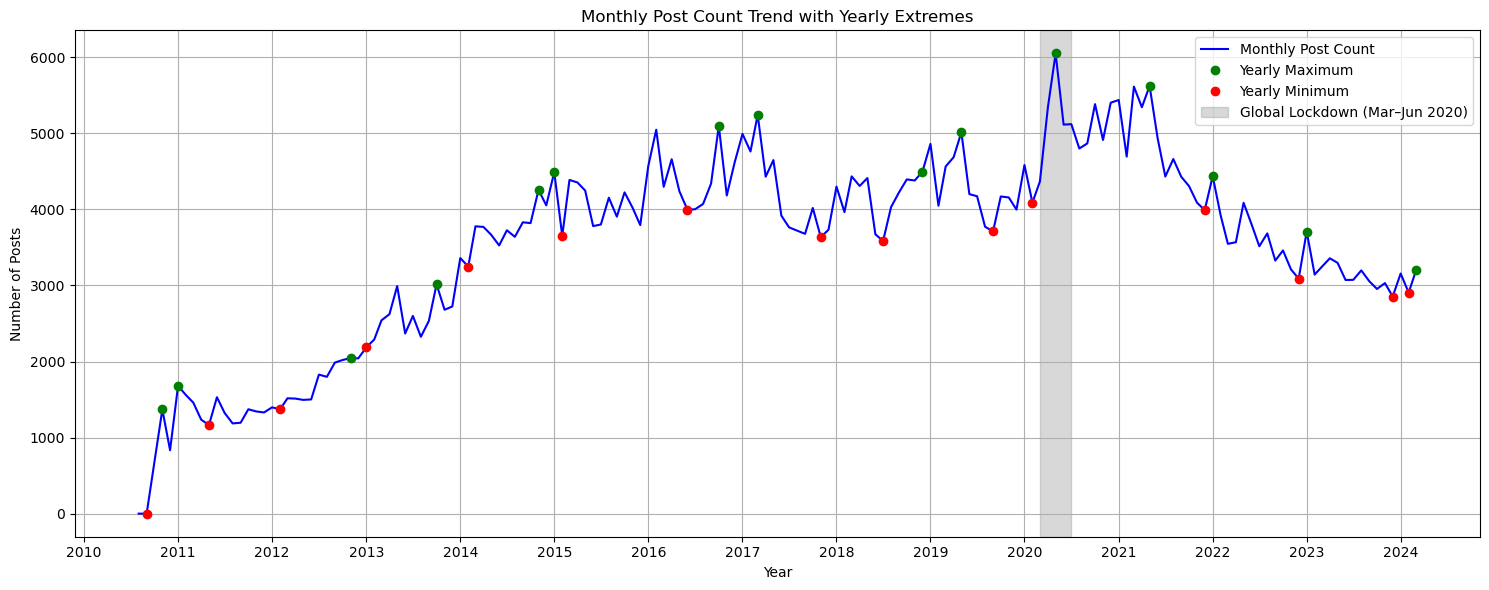

In [76]:
import matplotlib.dates as mdates
from datetime import datetime

plt.figure(figsize=(15, 6))
plt.plot(monthly_counts.index, monthly_counts.values, label="Monthly Post Count", color='blue', linewidth=1.5)

# Mark yearly maxima and minima
plt.plot(max_months['YearMonth'], max_months['PostCount'], 'o', color='green', label='Yearly Maximum')
plt.plot(min_months['YearMonth'], min_months['PostCount'], 'o', color='red', label='Yearly Minimum')

# Highlight lockdown period (March 1 to June 30, 2020)
lockdown_start = datetime(2020, 3, 1)
lockdown_end = datetime(2020, 6, 30)
plt.axvspan(lockdown_start, lockdown_end, color='gray', alpha=0.3, label='Global Lockdown (Mar–Jun 2020)')

# Formatting
plt.title("Monthly Post Count Trend with Yearly Extremes")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.legend()

# ---- Custom X-axis: yearly ticks only ----
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

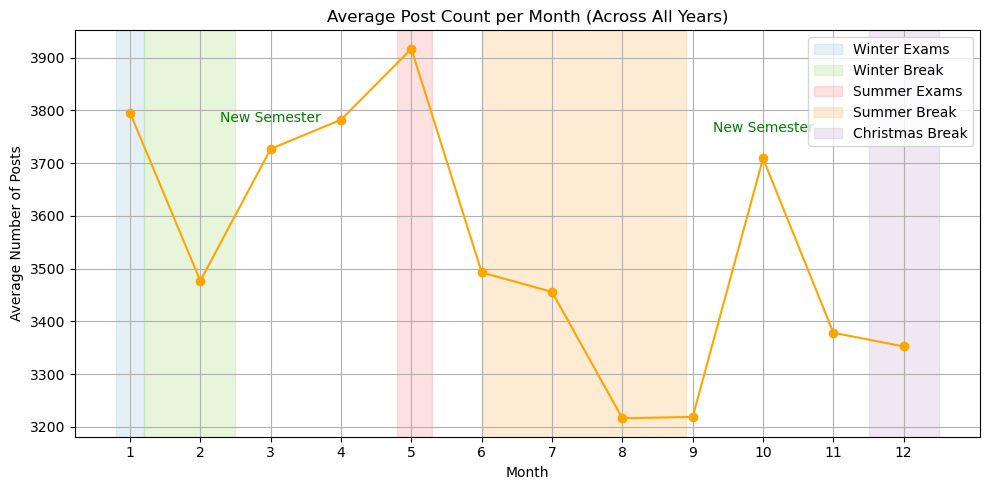

In [77]:
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

monthly_avg = monthly_counts_df.groupby('Month')['PostCount'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='orange')
plt.title("Average Post Count per Month (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Number of Posts")
plt.xticks(range(1, 13))
plt.grid(True)

# -------- 添加假期 & 考试区域块 --------
plt.axvspan(0.8, 1.2, color='#a6cee3', alpha=0.3, label="Winter Exams")
plt.axvspan(1.2, 2.5, color='#b2df8a', alpha=0.3, label="Winter Break")
plt.axvspan(4.8, 5.3, color='#fb9a99', alpha=0.3, label="Summer Exams")
plt.axvspan(6.0, 8.9, color='#fdbf6f', alpha=0.3, label="Summer Break")
plt.axvspan(11.5, 12.5, color='#cab2d6', alpha=0.3, label="Christmas Break")

# -------- 添加新学期标签 --------
plt.text(3,  monthly_avg.loc[3]  + 50, "New Semester", ha='center', color='green')
plt.text(10, monthly_avg.loc[10] + 50, "New Semester", ha='center', color='green')

# 避免图例重复
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

In [78]:
# 确保已有 YearMonth 和 PostCount 字段
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Year'] = monthly_counts_df['YearMonth'].dt.year
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

# 添加上一月的帖子数（按年排序确保对齐）
monthly_counts_df = monthly_counts_df.sort_values(['Year', 'Month'])
monthly_counts_df['PrevPostCount'] = monthly_counts_df.groupby('Year')['PostCount'].shift(1)

# 计算差值
monthly_counts_df['MonthDiff'] = monthly_counts_df['PostCount'] - monthly_counts_df['PrevPostCount']

# 去掉第一月（没有前一个月）
monthly_diff_by_month = monthly_counts_df.dropna(subset=['MonthDiff'])

# 按当前月份分组求差值均值（例如：3月是“3月-2月”的平均变化）
avg_diff_per_month = monthly_diff_by_month.groupby('Month')['MonthDiff'].mean()

In [79]:
monthly_counts_df = monthly_counts.reset_index()
monthly_counts_df.columns = ['YearMonth', 'PostCount']
monthly_counts_df['Month'] = monthly_counts_df['YearMonth'].dt.month

monthly_counts_df = monthly_counts_df.sort_values('YearMonth')
monthly_counts_df['MonthDiff'] = monthly_counts_df['PostCount'].diff()

monthly_diff_by_month = monthly_counts_df.dropna(subset=['MonthDiff'])

avg_diff_per_month = monthly_diff_by_month.groupby('Month')['MonthDiff'].mean()

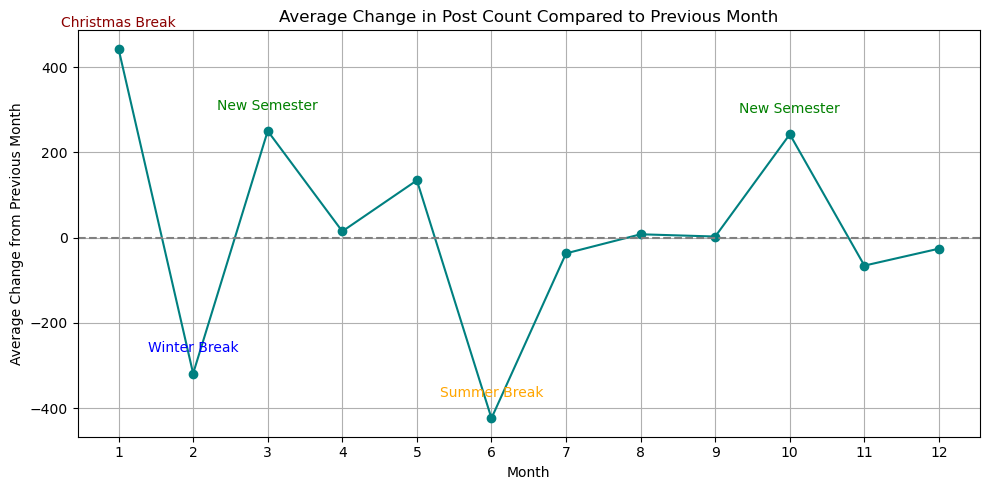

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(avg_diff_per_month.index, avg_diff_per_month.values, marker='o', linestyle='-', color='teal')
plt.axhline(0, color='gray', linestyle='--')

plt.title("Average Change in Post Count Compared to Previous Month")
plt.xlabel("Month")
plt.ylabel("Average Change from Previous Month")
plt.xticks(range(1, 13))
plt.grid(True)

plt.text(1, avg_diff_per_month.loc[1] + 50, "Christmas Break", ha='center', color='darkred')
plt.text(2, avg_diff_per_month.loc[2] + 50, "Winter Break", ha='center', color='blue')
plt.text(6, avg_diff_per_month.loc[6] + 50, "Summer Break", ha='center', color='orange')
plt.text(3, avg_diff_per_month.loc[3] + 50, "New Semester", ha='center', color='green')
plt.text(10, avg_diff_per_month.loc[10] + 50, "New Semester", ha='center', color='green')

plt.tight_layout()
plt.show()

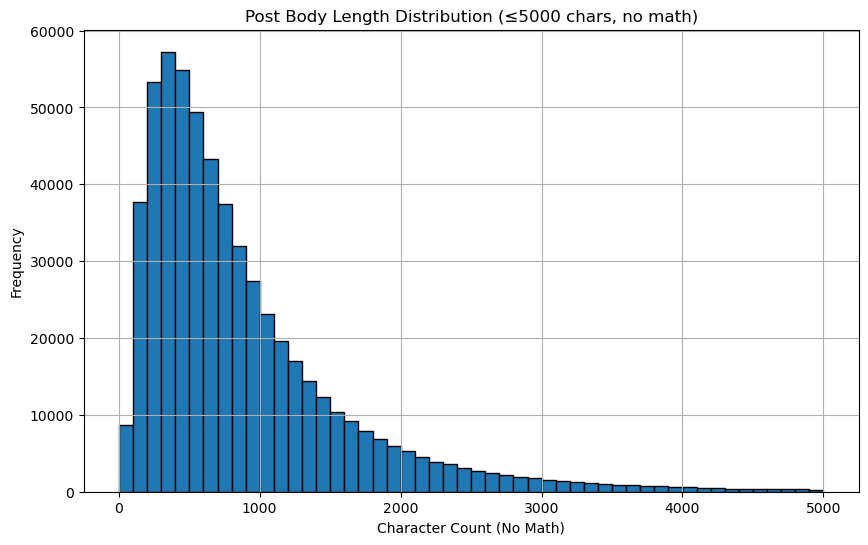

In [81]:
df['CleanBodyNoMath'] = df['Body'].apply(remove_math_expressions)

df['BodyLength_CleanedChar'] = df['CleanBodyNoMath'].str.len()

filtered = df[df['BodyLength_CleanedChar'] <= 5000]

plt.figure(figsize=(10, 6))
plt.hist(filtered['BodyLength_CleanedChar'], bins=50, edgecolor='black')
plt.title('Post Body Length Distribution (≤5000 chars, no math)')
plt.xlabel('Character Count (No Math)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [82]:
bins = [0, 200, 500, 1000, 2000, float('inf')]
labels = ['0–200', '201–500', '501–1000', '1001–2000', '>2000']

df['BodyLengthRange_NoMath'] = pd.cut(df['BodyLength_CleanedChar'], bins=bins, labels=labels)
distribution = df['BodyLengthRange_NoMath'].value_counts().sort_index()
percentage = (distribution / distribution.sum() * 100).round(2)

print("去除公式后的正文长度分布（百分比）：")
print(percentage)

去除公式后的正文长度分布（百分比）：
BodyLengthRange_NoMath
0–200         8.04
201–500      28.67
501–1000     32.84
1001–2000    21.96
>2000         8.49
Name: count, dtype: float64


In [84]:
# 设置长度区间
bins = [0, 200, 500, 1000, 2000, 5000]
labels = ['0–200', '201–500', '501–1000', '1001–2000', '2001–5000']

filtered['LengthRange'] = pd.cut(filtered['BodyLength_CleanedChar'], bins=bins, labels=labels)

# 分组查看 Score 的均值和中位数
score_stats = filtered.groupby('LengthRange')['Score'].agg(['mean', 'median', 'count'])
print(score_stats)

                 mean  median   count
LengthRange                          
0–200        1.754724     1.0   46413
201–500      2.091954     1.0  165387
501–1000     2.516494     1.0  189497
1001–2000    3.234246     2.0  126700
2001–5000    4.754324     2.0   45153


/var/folders/s1/fhhb47v56794fxv3thdrpkxm0000gn/T/ipykernel_97487/3047410178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['LengthRange'] = pd.cut(filtered['BodyLength_CleanedChar'], bins=bins, labels=labels)
/var/folders/s1/fhhb47v56794fxv3thdrpkxm0000gn/T/ipykernel_97487/3047410178.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_stats = filtered.groupby('LengthRange')['Score'].agg(['mean', 'median', 'count'])


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


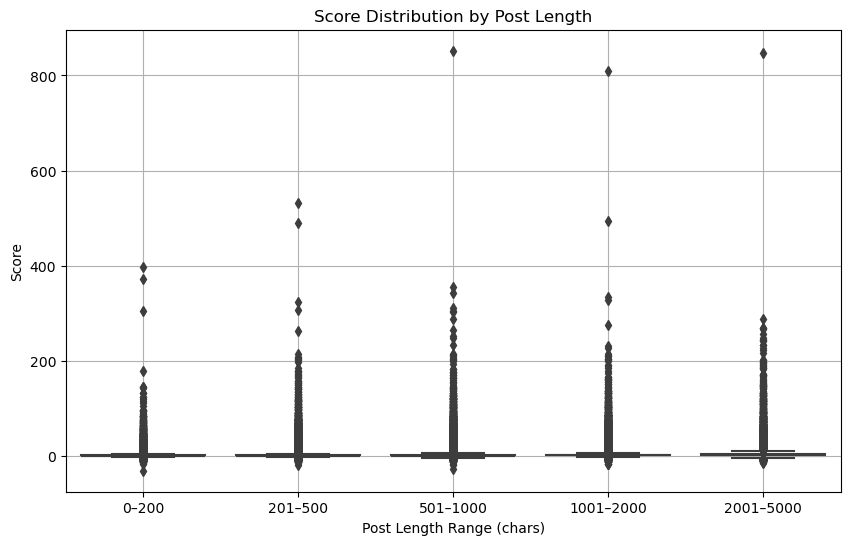

In [85]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='LengthRange', y='Score', data=filtered)
plt.title('Score Distribution by Post Length')
plt.xlabel('Post Length Range (chars)')
plt.ylabel('Score')
plt.grid(True)
plt.show()